In [83]:
%pylab inline
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from pandas.tools.plotting import parallel_coordinates
from sklearn.metrics import zero_one_loss


Populating the interactive namespace from numpy and matplotlib


# Importación y procesamiento de datos

In [104]:
data= pd.DataFrame(pd.read_csv("wine.data", header = None))
data.columns = ["Class", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"]
#data = loadtxt("wine.data", delimiter = ",")
#target = data[:,0]
#plt.figure()
target = data["Class"]
scaled_data = preprocessing.scale(data) #Desviacion estandar = 1 y promedio = 0

Transormación de labels para hacer comparación adecuada

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(scaled_data, target)

#K-means clustering 

In [51]:
errors_km = np.zeros(10)
for i in range(1,11):
    fit_K  = KMeans(n_clusters = i).fit(X_train, Y_train)
    errors_km[i-1] = fit_K.inertia_    

El error en este caso se define como la distancia total que hay entre los todos los puntos y el centro del cluster más cercano 

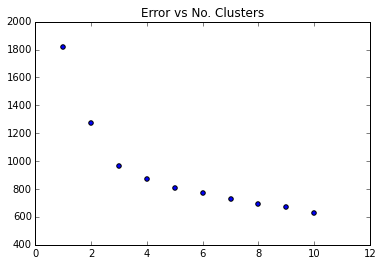

In [52]:
x = linspace(1, 10, 10)
scatter(x, errors_km)
title("Error vs No. Clusters")

Se puede ver que al llegar a tres clusters el error disminuye en menor medida cuando se aumenta el número de clusters. Es por esto que el número de clusters óptimo para esta caso sería tres.

In [116]:
km = KMeans(n_clusters = 3)
fit = km.fit(X_train, Y_train)
predict_km = km.predict(X_test)

Teniendo en cuenta que la predicción en de kmeans consiste en agrupar los puntos al cluster más cercano, no se puede hacer una comparación directa entre los labels dados por la función predict() y el target del dataset.

In [117]:
cluster0 = []
cluster1 = []
cluster2 = []
for i in range(len(predict_km)):
    cluster = predict_km[i]
    if cluster ==  0:
        cluster0.append(cluster)
    elif cluster == 1:
        cluster1.append(cluster)
    else:
        cluster2.append(cluster)
        
pct0_test = float(len(cluster0))/float((len(Y_test)))
pct1_test = float(len(cluster1))/float((len(Y_test)))
pct2_test = float(len(cluster2))/float((len(Y_test)))

In [118]:
grupo1 = []
grupo2 = []
grupo3 = []
for i in range(len(Y_train)):
    grupo = Y_train.iloc[i]
    if grupo ==  1:
        grupo1.append(grupo)
    elif grupo == 2:
        grupo2.append(grupo)
    else:
        grupo3.append(grupo)
        
pct1_train = float(len(grupo1))/float((len(Y_train)))
pct2_train = float(len(grupo2))/float((len(Y_train)))
pct3_train = float(len(grupo3))/float((len(Y_train)))


In [119]:
print pct0_test, pct1_test, pct2_test, pct1_train, pct2_train, pct3_train

0.311111111111 0.444444444444 0.244444444444 0.345864661654 0.443609022556 0.210526315789


Mirando los porcentajes de los elementos en cada grupo se puede concluir que el cluster 0 corresponde a la clase 2, el cluster 1 a la clase 3 y el cluster 2 a la clase 1.

In [121]:
#Transformación de label de cluster a clase
for n,i in enumerate(predict_km):
    if i==2:
        predict_km[n]=1
    elif i ==1:
        predict_km[n] = 3
    else:
        predict_km[n]  = 2

In [122]:
good_class_km = 0
for i in range(len(predict_km)):
    if predict_km[i] == Y_test.iloc[i]:
        good_class += 1
print good_class/len(predict_rf)

1


#PCA

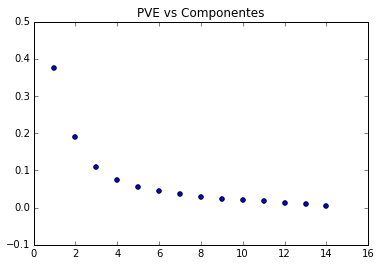

In [49]:
fit_PCA_test = PCA().fit(X_train, Y_train)
PVE = fit_PCA_test.explained_variance_ratio_
scatter(range(1,15),PVE)
title("PVE vs Componentes")

Como se quiere explicar el 95% de la varianza, se puede ver en la gráfica que serán necesarias 4 componentes. Sin embargo, se puede ver que después de la tercera componente cada una de las componentes explica menos del 5%. Esto se observa en la forma en la que la gráfica tiende a saturarse después de la tercera componenente. Es por esto que el número óptimo de componentes sería tres.

In [50]:
fit_PCA = PCA(n_components = 3)
fit_PCA.fit(scaled_data)
PCA_result = fit_PCA.transform(scaled_data)

#Random Forest

In [79]:
n_trees_total = 50
error_rf = np.zeros(n_trees_total)
m = 3 #Se toma como el numero de predictores como sqrt(p)
for i in range(1,n_trees_total+1):
    rf_test = RandomForestClassifier(n_estimators = n_trees_total, max_features =  m)
    fit = rf_test.fit(X_train, Y_train)
    error_rf[i-1] = fit.oob_score

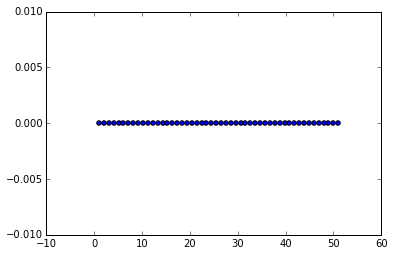

In [80]:
x = linspace(1, n_trees_total+1, n_trees_total)
scatter(x, error_rf)

La gráfica sugiere que sin importar el número de árboles se logrará una clasificación perfecta de los datos de entrenamiento.

In [81]:
rf = RandomForestClassifier(n_estimators=n_trees_total, max_features=3)
fit_rf = rf.fit(X_train, Y_train) 
predict_rf = rf.predict(X_test)

Conteo de classificacion correcta

In [91]:
good_class = 0
for i in range(len(predict_rf)):
    if predict_rf[i] == Y_test.iloc[i]:
        good_class += 1
print good_class/len(predict_rf)

1


El resultado muestra que usando random forest se logra una clasificación perfecta de los datos de prueba.

#SVM